In [53]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
plt.rc("text", usetex=True)
# plt.rc("figure", dpi=100)
plt.rc("xtick", labelsize=16)
plt.rc("ytick", labelsize=16)
plt.rc("axes", labelsize=24)
plt.rc("axes", titlesize=24)

In [54]:
mu0, Sigma0 = np.array([0, 0]), np.array([[1, 0], [0, 1]])
mu1, Sigma1 = np.array([3, 3]), 4*np.array([[1, -0.5], [-0.5, 1]])
N = 500
X0_train = np.random.multivariate_normal(mu0, Sigma0, size=N)
X1_train = np.random.multivariate_normal(mu1, Sigma1, size=N)
X_train = np.concatenate((X0_train, X1_train))
y_train = np.concatenate((np.zeros(N), np.ones(N)))

N = 100
X0_valid = np.random.multivariate_normal(mu0, Sigma0, size=N)
X1_valid = np.random.multivariate_normal(mu1, Sigma1, size=N)
X_valid = np.concatenate((X0_valid, X1_valid))
y_valid = np.concatenate((np.zeros(N), np.ones(N)))

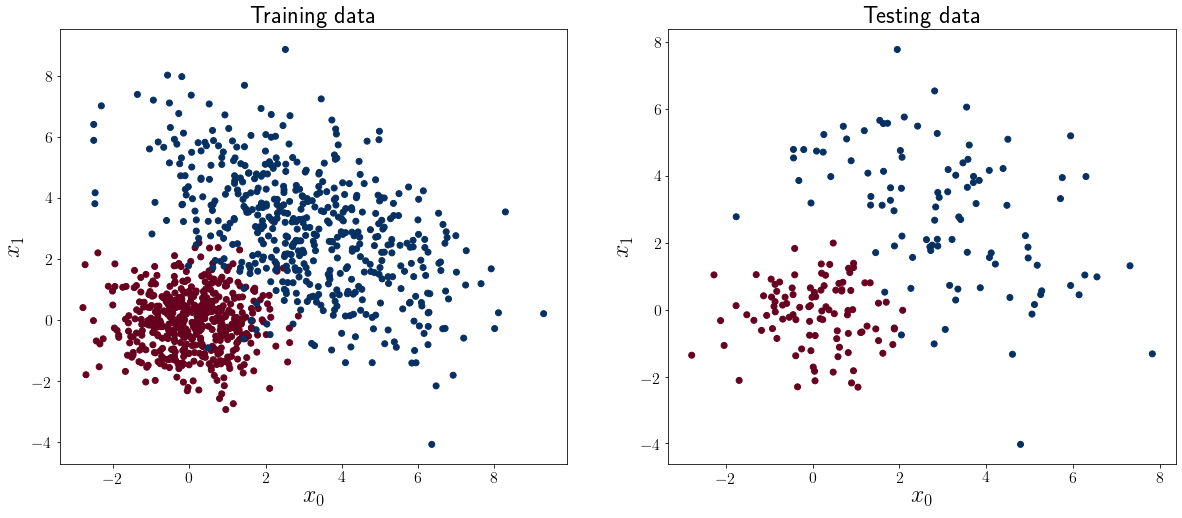

<Figure size 432x288 with 0 Axes>

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdBu")
ax[0].set_xlabel(r"$x_0$")
ax[0].set_ylabel(r"$x_1$")
ax[0].set_title(r"Training data")

ax[1].scatter(X_valid[:, 0], X_valid[:, 1], c=y_valid, cmap="RdBu")
ax[1].set_xlabel(r"$x_0$")
ax[1].set_ylabel(r"$x_1$")
ax[1].set_title(r"Testing data")

plt.show()
plt.clf()

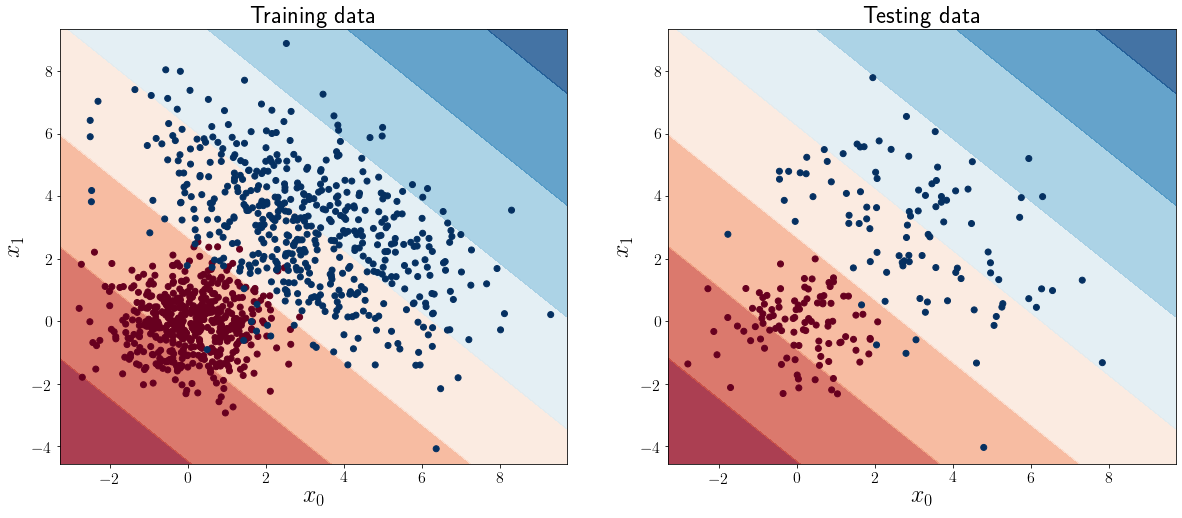

Training error: 0.03300000000000003
Testing error: 0.030000000000000027


<Figure size 432x288 with 0 Axes>

In [58]:
clf = SVC(C=50, kernel="linear")
clf.fit(X_train, y_train)

h = 0.1
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].contourf(xx, yy, Z, cmap="RdBu", alpha=0.8)
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdBu")
ax[0].set_xlabel(r"$x_0$")
ax[0].set_ylabel(r"$x_1$")
ax[0].set_title(r"Training data")

ax[1].contourf(xx, yy, Z, cmap="RdBu", alpha=0.8)
ax[1].scatter(X_valid[:, 0], X_valid[:, 1], c=y_valid, cmap="RdBu")
ax[1].set_xlabel(r"$x_0$")
ax[1].set_ylabel(r"$x_1$")
ax[1].set_title(r"Testing data")

plt.show()
plt.clf()

print("Training error:", 1 - clf.score(X_train, y_train))
print("Testing error:", 1 - clf.score(X_valid, y_valid))

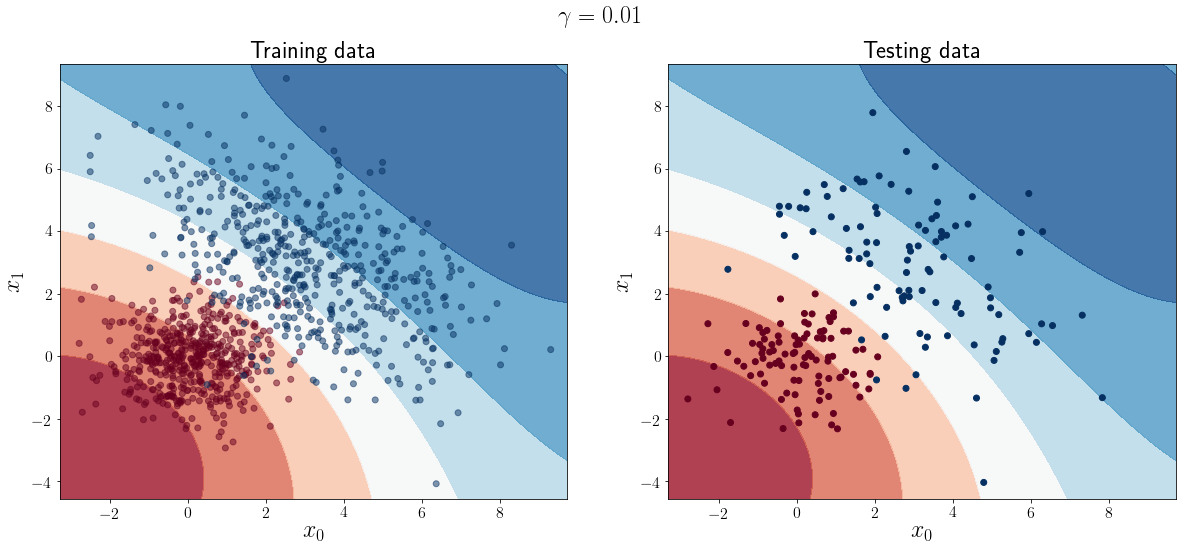

Training error: 0.02400000000000002
Testing error: 0.025000000000000022


<Figure size 432x288 with 0 Axes>

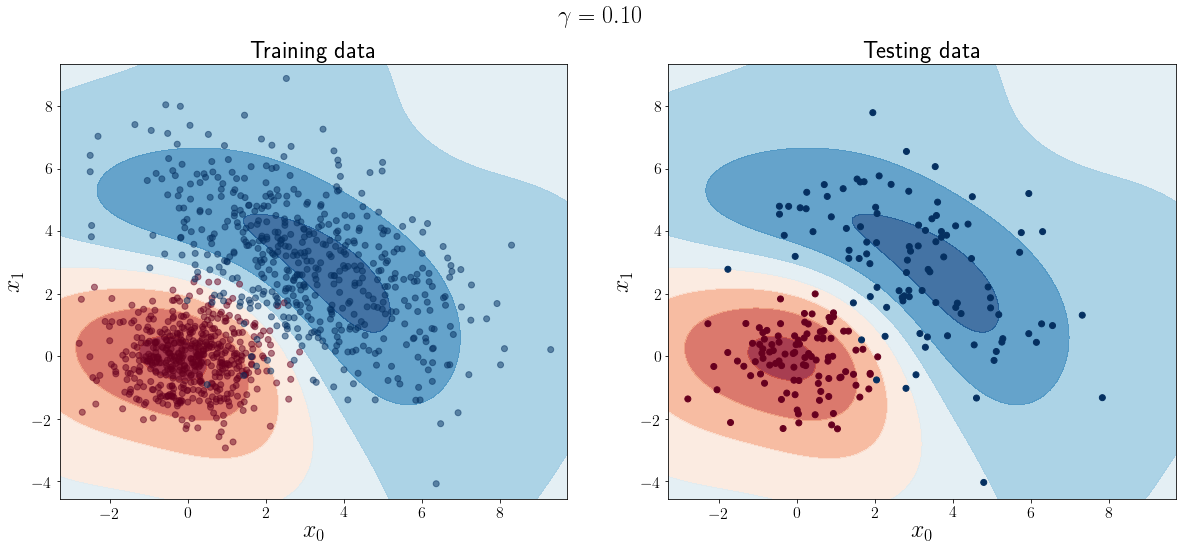

Training error: 0.02400000000000002
Testing error: 0.015000000000000013


<Figure size 432x288 with 0 Axes>

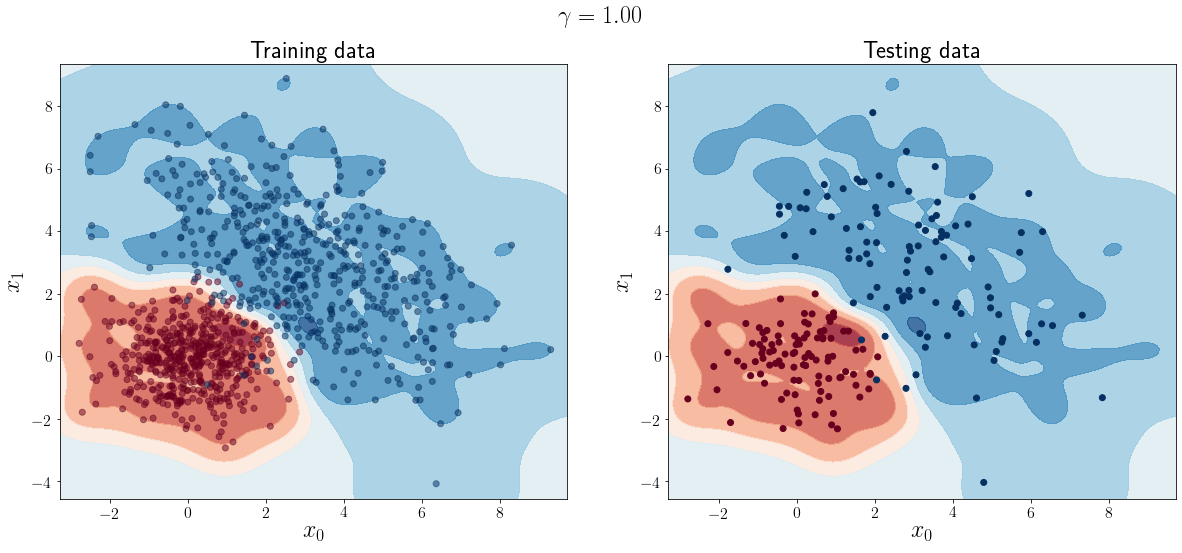

Training error: 0.02200000000000002
Testing error: 0.020000000000000018


<Figure size 432x288 with 0 Axes>

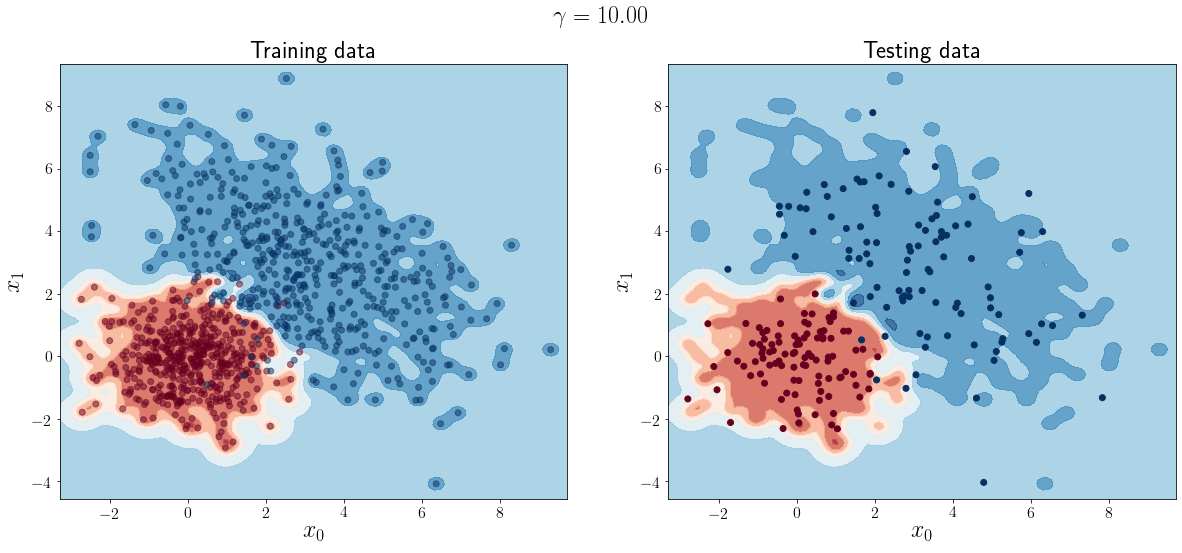

Training error: 0.018000000000000016
Testing error: 0.03500000000000003


<Figure size 432x288 with 0 Axes>

In [59]:
h = 0.1
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

gammas = [0.01, 0.1, 1, 10]
for gamma in gammas:
    clf = SVC(C=1, kernel="rbf", gamma=gamma)
    clf.fit(X_train, y_train)
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    plt.suptitle(r"$\gamma = {:.2f}$".format(gamma), fontsize=24)
    
    ax[0].contourf(xx, yy, Z, cmap="RdBu", alpha=0.8)
    ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdBu", alpha=0.5)
    ax[0].set_xlabel(r"$x_0$")
    ax[0].set_ylabel(r"$x_1$")
    ax[0].set_title(r"Training data")
    
    ax[1].contourf(xx, yy, Z, cmap="RdBu", alpha=0.8)
    ax[1].scatter(X_valid[:, 0], X_valid[:, 1], c=y_valid, cmap="RdBu", alpha=1)
    ax[1].set_xlabel(r"$x_0$")
    ax[1].set_ylabel(r"$x_1$")
    ax[1].set_title(r"Testing data")
    
    plt.show()
    plt.clf()
    
    print("Training error:", 1 - clf.score(X_train, y_train))
    print("Testing error:", 1 - clf.score(X_valid, y_valid))